In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan  6 23:18:33 2022

@author: to_reilly
"""

import numpy as np
import matplotlib.pyplot as plt

import pickle, lzma

In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/kelu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [10]:
if 0:
    fileIdx = np.arange(63,64)

    rawRFdata       = []
    rawGradData     = [] #contains the frequency encoding gradient
    rawPhaseData    = [] #contains the phase encoding gradient
    rawPulseData    = [] #data containing the blanking signal from the RF amp, (in this case, with hard pulses) represent the envelope of the RF pulse 

    for idx in fileIdx:
        print("Process",idx)
        rawRFdata.append(np.genfromtxt(r'Raw data/C1--Line--%05d.csv'%(idx), delimiter = ',', skip_header = 5))
        rawGradData.append(np.genfromtxt(r'Raw data/C2--Line--%05d.csv'%(idx), delimiter = ',', skip_header = 5))
        rawPhaseData.append(np.genfromtxt(r'Raw data/C3--Line--%05d.csv'%(idx), delimiter = ',', skip_header = 5))
        rawPulseData.append(np.genfromtxt(r'Raw data/C4--Line--%05d.csv'%(idx), delimiter = ',', skip_header = 5))

        pickle.dump(1E6*np.array(rawRFdata[-1][:,0]).astype(np.float32), lzma.open(r'pkl/C0--Line--%05d.pkl.lzma'%(idx), 'wb'))
        pickle.dump(   rawRFdata[-1][:,1].astype(np.float16), lzma.open(r'pkl/C1--Line--%05d.pkl.lzma'%(idx), 'wb'))
        pickle.dump( rawGradData[-1][:,1].astype(np.float16), lzma.open(r'pkl/C2--Line--%05d.pkl.lzma'%(idx), 'wb'))
        pickle.dump(rawPhaseData[-1][:,1].astype(np.float16), lzma.open(r'pkl/C3--Line--%05d.pkl.lzma'%(idx), 'wb'))
        pickle.dump(rawPulseData[-1][:,1].astype(np.float16), lzma.open(r'pkl/C4--Line--%05d.pkl.lzma'%(idx), 'wb'))
        print(rawRFdata[-1][:,0])
    rawRFdata   = np.array(rawRFdata)
    rawGradData = np.array(rawGradData)
    rawPhaseData= np.array(rawPhaseData)

    print("Go!")
    np.savez_compressed("rawRFdata", rawRFdata = rawRFdata)
    np.savez_compressed("rawGradData", rawGradData = rawGradData)
    np.savez_compressed("rawPhaseData", rawPhaseData = rawPhaseData)
    np.savez_compressed("rawPulseData", rawPulseData = rawPulseData)
    np.savez_compressed("t", t=t)

    pickle.dump(   rawRFdata.astype(np.float16), lzma.open(r'C1.pkl.lzma'%(idx), 'wb'))
    pickle.dump( rawGradData.astype(np.float16), lzma.open(r'C2.pkl.lzma'%(idx), 'wb'))
    pickle.dump(rawPhaseData.astype(np.float16), lzma.open(r'C3.pkl.lzma'%(idx), 'wb'))
    pickle.dump(rawPulseData.astype(np.float16), lzma.open(r'C4.pkl.lzma'%(idx), 'wb'))

    t = np.array(t).astype(np.float32)
    rawRFdata   = np.array(rawRFdata).astype(np.float16)
    rawGradData = np.array(rawGradData).astype(np.float16)
    rawPhaseData= np.array(rawPhaseData).astype(np.float16)
    rawPulseData= np.array(rawPulseData).astype(np.float16)

# Loading data

In [9]:
rawRFdata    = np.load('rawRFdata.npz')   ["rawRFdata"]
rawGradData  = np.load('rawGradData.npz') ["rawGradData"]
rawPhaseData = np.load('rawPhaseData.npz')["rawPhaseData"]
rawPulseData = np.load('rawPulseData.npz')["rawPulseData"]
t            = np.load('t.npz')["t"]


# Visualisation

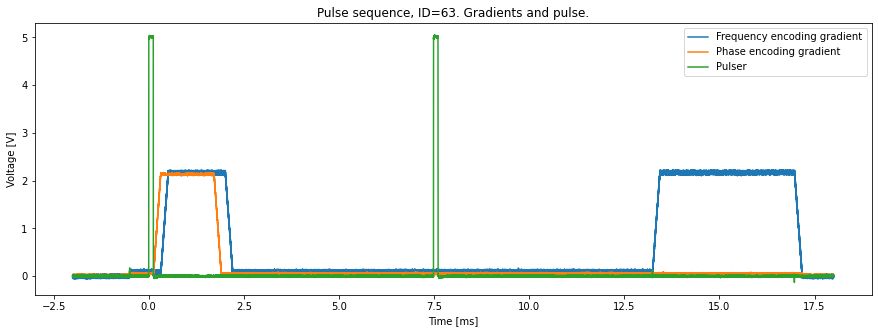

In [11]:
plt.figure(figsize=(15,5))
plt.plot(t[63]/1e3, rawGradData[63],label = "Frequency encoding gradient")
plt.plot(t[63]/1e3, rawPhaseData[63],label = "Phase encoding gradient")
plt.plot(t[63]/1e3, rawPulseData[63],label = "Pulser")
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.title("Pulse sequence, ID=63. Gradients and pulse.")
plt.legend()


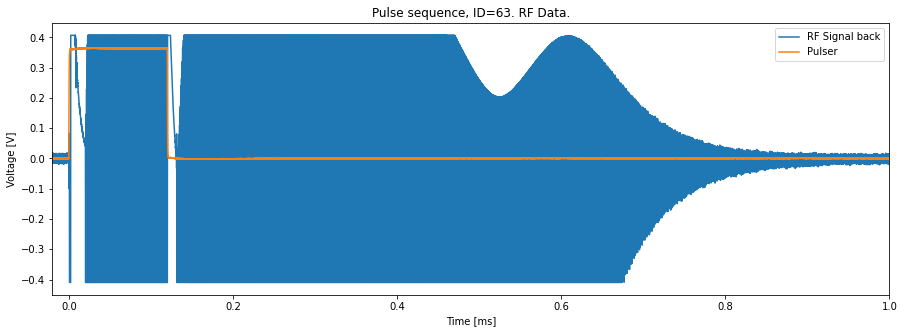

In [12]:
plt.figure(figsize=(15,5))
plt.plot(t[63]/1e3, rawRFdata[63],label = "RF Signal back") 
plt.plot(t[63]/1e3, rawPulseData[63]/13.8,label = "Pulser")
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.title("Pulse sequence, ID=63. RF Data.")
plt.xlim(-0.02, 1.0)
plt.legend()


In [13]:
timeScale   = t[0]
dt          = timeScale[1] - timeScale[0]
print(timeScale)
acqWindow   = 3.2*1e3       #length of acquisition window
echoTime    = 15*1e3 + 150  #echo time and center of the acquisition window
centerFreq  = 2.1485        #center frequency
BW          = 20*1e-3       #imaging bandwidth

[-2000.0017 -1999.9817 -1999.9617 ... 17999.979  18000.     18000.018 ]


In [14]:
timeWindow  = np.where((echoTime - acqWindow/2 < timeScale) & (timeScale < echoTime + acqWindow/2))[0]
startWindow = timeWindow[0]
endWindow   = timeWindow[-1]
print(startWindow,endWindow)

777501 937500


In [15]:
cutRFdata   = rawRFdata[:,startWindow:endWindow+1]
cutTimeScale= timeScale[startWindow:endWindow+1]
frequencies = np.fft.fftshift(np.fft.fftfreq(np.size(cutTimeScale), d = dt))
print(cutRFdata)

[[ 0.0148 -0.0094  0.0098 ...  0.0126 -0.0142  0.009 ]
 [ 0.005  -0.002   0.0106 ...  0.0158 -0.0114  0.004 ]
 [-0.0044  0.0066 -0.0034 ...  0.0148 -0.0024 -0.0054]
 ...
 [ 0.0002 -0.0074  0.0068 ...  0.0088 -0.0044  0.003 ]
 [ 0.002  -0.008   0.002  ... -0.002   0.0038  0.0058]
 [-0.009   0.0088 -0.005  ...  0.0074  0.0006 -0.0056]]


In [16]:
freqWindow  = np.where((centerFreq - BW/2 < frequencies) & (frequencies < centerFreq + BW/2))[0]
startFreq   = freqWindow[0]
endFreq     = freqWindow[-1]


In [24]:
frequencies

array([-24.97560976, -24.97529756, -24.97498537, ...,  24.97467317,
        24.97498537,  24.97529756])

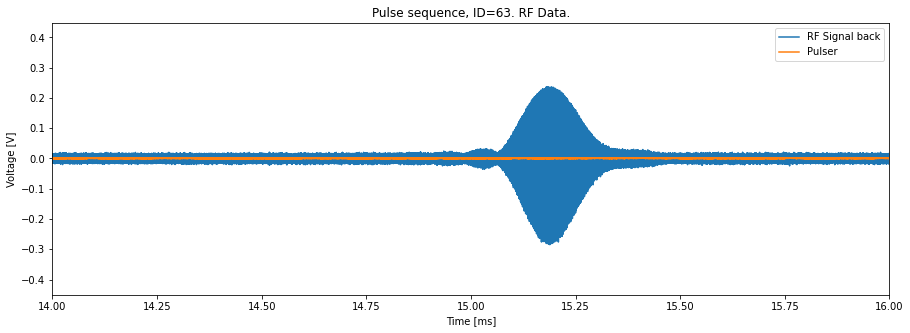

In [29]:
plt.figure(figsize=(15,5))
plt.plot(t[63]/1e3, rawRFdata[0],label = "RF Signal back") 
plt.plot(t[63]/1e3, rawPulseData[0]/13.8,label = "Pulser")
plt.xlabel("Time [ms]")
plt.ylabel("Voltage [V]")
plt.title("Pulse sequence, ID=63. RF Data.")
plt.xlim(14,16)
plt.legend()


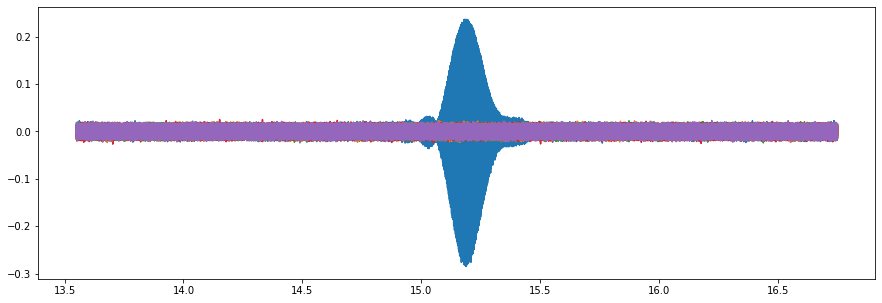

In [40]:
plt.figure(figsize=(15,5))
plt.plot(timeScale[startWindow:endWindow+1]/1000,cutRFdata[0])
plt.plot(timeScale[startWindow:endWindow+1]/1000,cutRFdata[20])
plt.plot(timeScale[startWindow:endWindow+1]/1000,cutRFdata[30])
plt.plot(timeScale[startWindow:endWindow+1]/1000,cutRFdata[40])
plt.plot(timeScale[startWindow:endWindow+1]/1000,cutRFdata[50])

In [32]:
ordRFdata   = np.zeros(np.shape(cutRFdata))
print("Shape:",np.shape(cutRFdata))
ordRFdata[32:,:]   = cutRFdata[1::2,:] 
ordRFdata[:32,:]   = np.flip(cutRFdata[::2,:], axis = 0) 

Shape: (64, 160000)


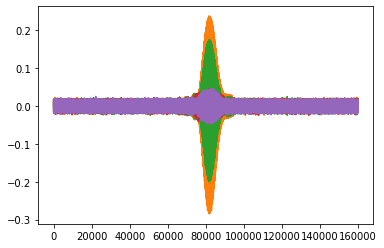

In [46]:
for k in range(5):
    plt.plot(ordRFdata[32-k])

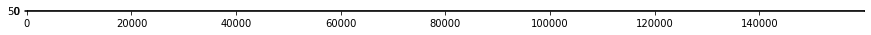

In [33]:
plt.figure(figsize=(15,15))
plt.imshow(ordRFdata, cmap = 'gray')

In [36]:
image       = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(ordRFdata)))
print("Shape image:",np.shape(image))
cutImage    = image[:,startFreq:endFreq+1]
print("Shape cutImage:",np.shape(cutImage))

Shape image: (64, 160000)
Shape cutImage: (64, 64)


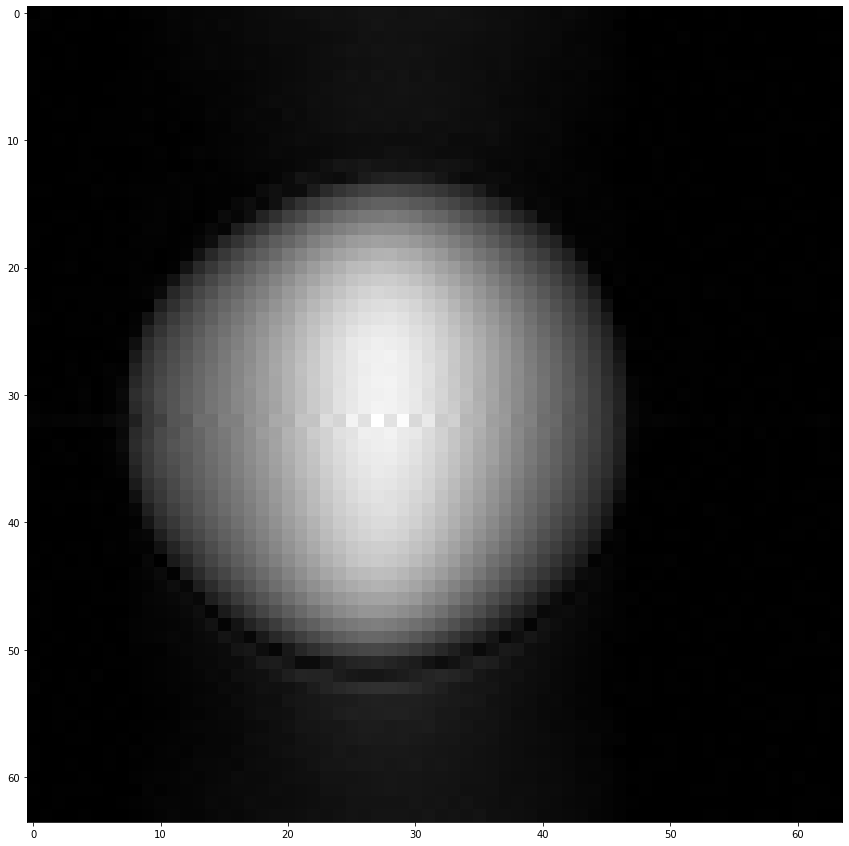

In [47]:
plt.figure(figsize=(15,15))
plt.imshow(np.abs(cutImage), cmap = 'gray')